### DM  ( A rendre avant le 29/04)

Nous disposons de 3 fonctions qui nous permettent de trier un tableau.

* Créez un programme qui compare ces fonctions avec des vecteurs aléatoires de taille N=100:10000 avec un pas egale à 100. Soit t1, t2, t3 trois vecteurs pour chaque fonction. 

1. Pour chaque taille n dans N, générer 10 vecteurs aléatoires. 
* Triez-les en utilisant chaque fonction. Conserver le temps d'exécution <b> moyen </b> de chaque fonction dans t1, t2 et t3. 
2. Tracez (N,t1), (N,t2) et (N,t3). 
3. Comparez les graphiques avec la complexité de chaque méthode.
4. Conclure

* Remarques : vos fonctions doivent utiliser des vecteurs numpy uniquement. 

Voici comment trouver le temps d'execution d'un bloc d'instructions.

In [1]:
import timeit
debut = timeit.default_timer()
#Les instructions .. 

#..
fin = timeit.default_timer()

print('Temps : ', debut - fin)  

Temps :  -0.00022360000002663583


# Solution DM


In [2]:
import timeit
debut = timeit.default_timer()
#Les instructions .. 

#..
fin = timeit.default_timer()

print('Temps : ', fin - debut)  

Temps :  8.240000170189887e-05


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def tabsort(t):
    n = len(t)
    for j in range (n):
        for i in range (n-1):
            if t[i]>t[i+1]:
                x = t[i]
                t[i] = t[i+1]
                t[i+1] = x
    return t;


In [5]:
def rsort(a):
    n = len(a)
    for j in range (n):
        min = j
        for i in range (j+1,n):
            if a[min]>a[i]:
                min = i
        x = a[j]
        a[j] = a[min]
        a[min] = x
    return a;


In [6]:
#TRI RAPIDE
def part_tab(l,D,F):
#choix du pivot
    pivot = l[F]
    indice_p = D
#partionnement de la liste en deux partie dont les valeur sont sup et inf au pivot:

    for i in range(D, F):
        if l[i] <= pivot:
            l[i], l[indice_p] = l[indice_p], l[i]
            indice_p += 1
    l[indice_p], l[F] = l[F], l[indice_p]
#cette fonction retourne l'indice du pivot :
    return indice_p
def trirap(l,D=0,F=None):
    if F == None :
        F = len(l)-1
    if F > D :
#on fait appelle a la fonction part_tab pour determiner le pivot a chaque traitement
        piv = part_tab(l,D,F)
#tri de la partie inf (gauche):
        trirap(l,D,piv-1)
#tri de la partie sup (droite):
        trirap(l,piv+1,F)
    return l

In [7]:
a1 = np.zeros(10)
a2 = np.zeros(10)
a3 = np.zeros(10)
x = np.zeros(99)
t1 = np.zeros(99)
t2 = np.zeros(99)
t3 = np.zeros(99)

In [8]:
for i in range(100,10000,100):
    for j in range(10):
        v = np.random.random(i)
        l = np.copy(v)
        k = np.copy(v)

        


        debut1 = timeit.default_timer()
        rsort(v)
        fin1 = timeit.default_timer()

        a1[j]= fin1 - debut1

        debut2 = timeit.default_timer()
        tabsort(l)
        fin2 = timeit.default_timer()

        a2[j]= fin2 - debut2

        debut3 = timeit.default_timer()
        trirap(k)
        fin3 = timeit.default_timer()
    
        a3[j]= fin3 - debut3
    
    b = int(i/100)-1
    t1[b] = a1.mean()
    t2[b] = a2.mean()
    t3[b] = a3.mean()
    x[b] = i
       

print("temps d'execution moyen tri par selection",t1)
print("temps d'execution moyen tri à bulles",t2)
print("temps d'execution moyen tri rapide",t3)
print("la taille des vecteurs",x)


temps d'execution moyen tri par selection [3.75878000e-03 9.95958000e-03 2.35125500e-02 3.94552200e-02
 6.08993900e-02 8.59999900e-02 1.16170990e-01 1.55583430e-01
 1.90236630e-01 2.42250070e-01 3.21796470e-01 3.45918000e-01
 4.05681200e-01 4.63596670e-01 6.28199670e-01 6.39808620e-01
 6.81467470e-01 8.17845140e-01 8.66699390e-01 1.00206939e+00
 1.09477117e+00 1.19871395e+00 1.30272252e+00 1.43941174e+00
 1.59151796e+00 1.72157441e+00 1.81735104e+00 1.99027595e+00
 2.17348189e+00 2.48548934e+00 2.46450182e+00 2.58770110e+00
 2.67463804e+00 2.90857446e+00 2.90787314e+00 2.85975662e+00
 2.95922499e+00 3.14470052e+00 3.35270715e+00 3.85778263e+00
 4.73637506e+00 5.31982753e+00 4.79894695e+00 4.94800397e+00
 5.32421628e+00 5.78424972e+00 6.13795745e+00 1.49422496e+01
 1.69974137e+01 1.17214505e+01 1.25931178e+01 2.39167031e+01
 1.36994392e+01 1.11202426e+01 1.20924810e+01 2.01520023e+01
 2.54198525e+01 1.61925369e+01 2.18898879e+01 2.24338241e+01
 1.19943856e+01 9.55513857e+00 1.07084084e+

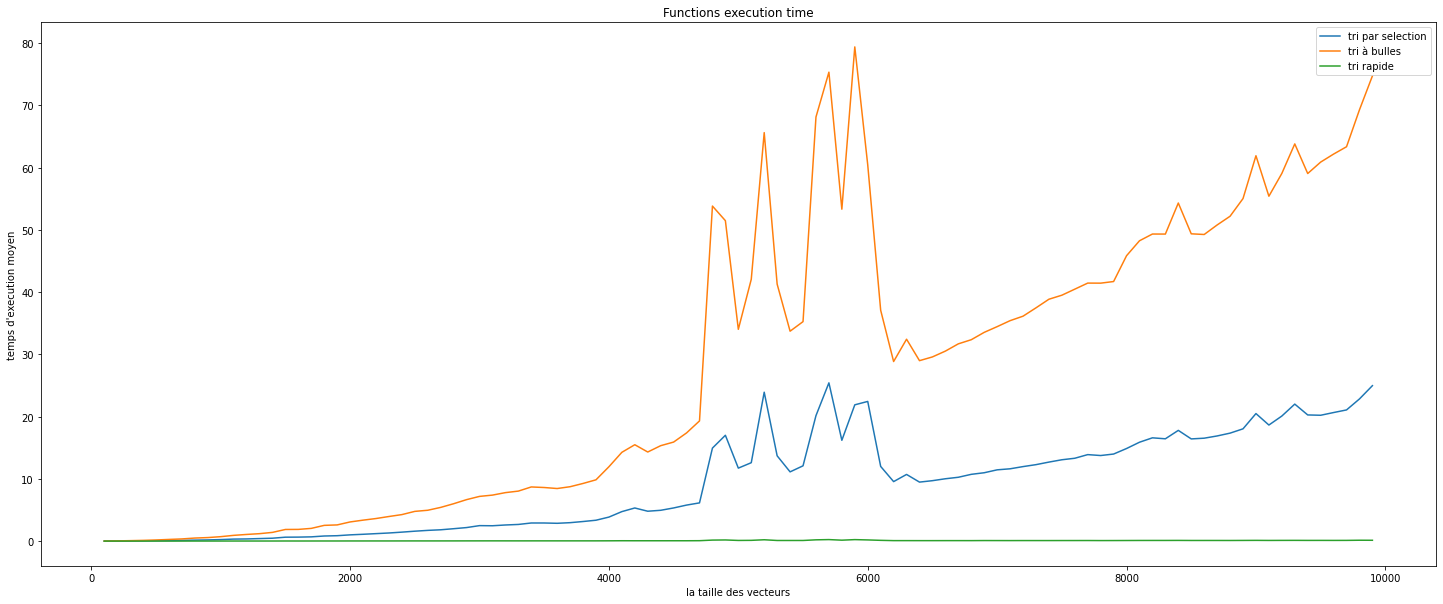

In [10]:
plt.figure(figsize = (25,10))
plt.plot(x, t1, label="tri par selection")
plt.plot(x, t2, label="tri à bulles")
plt.plot(x, t3, label="tri rapide")
plt.xlabel("la taille des vecteurs")
plt.ylabel("temps d'execution moyen")
plt.title('Functions execution time')
plt.legend(["tri par selection", "tri à bulles", "tri rapide"])

plt.show()